In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Librerias

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [6]:
import requests

### Code


In [7]:

def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    ''' Busca informacion en la API de cryptowat de la moneda que se pida,
    y devuelve un dataframe con la saiguiente informacion
     'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    '''
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

Obtengo informacion de la ultima semana


In [12]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(30))

In [13]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [14]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [20]:
dai =get_historic_price('dai', 'bitstamp', after = last_week)

BITCOIN


In [19]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-11-06 12:00:00,1628.4,1629.3,1609.9,1620.0,525.736504,850631.463045
2022-11-06 13:00:00,1620.3,1624.7,1616.8,1618.9,152.372058,247076.760535
2022-11-06 14:00:00,1618.8,1623.0,1616.1,1621.8,130.427293,211393.683480
2022-11-06 15:00:00,1621.8,1631.2,1618.4,1626.2,129.005444,209717.531133
2022-11-06 16:00:00,1626.7,1633.4,1624.4,1624.4,181.931803,296337.676335


In [18]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-11-06 12:00:00,21263,21275,21192,21252,46.996550,997584.039501
2022-11-06 13:00:00,21254,21268,21222,21230,38.710152,822276.439684
2022-11-06 14:00:00,21230,21246,21210,21218,15.239792,323482.032098
2022-11-06 15:00:00,21218,21255,21193,21222,11.529083,244681.228403
2022-11-06 16:00:00,21222,21289,21222,21245,21.401485,455134.658076


In [22]:
dai.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-11-07 15:00:00,1.00000,1.00000,1.00000,1.00000,997.00897,997.008970
2022-11-08 13:00:00,0.99998,1.00000,0.99998,1.00000,2193.30331,2193.273309
2022-11-08 16:00:00,0.99997,0.99997,0.99997,0.99997,217.53652,217.529994
2022-11-08 19:00:00,0.99998,0.99998,0.99998,0.99998,58.80000,58.798824
2022-11-08 22:00:00,0.99932,0.99932,0.99931,0.99931,5292.52329,5288.901469


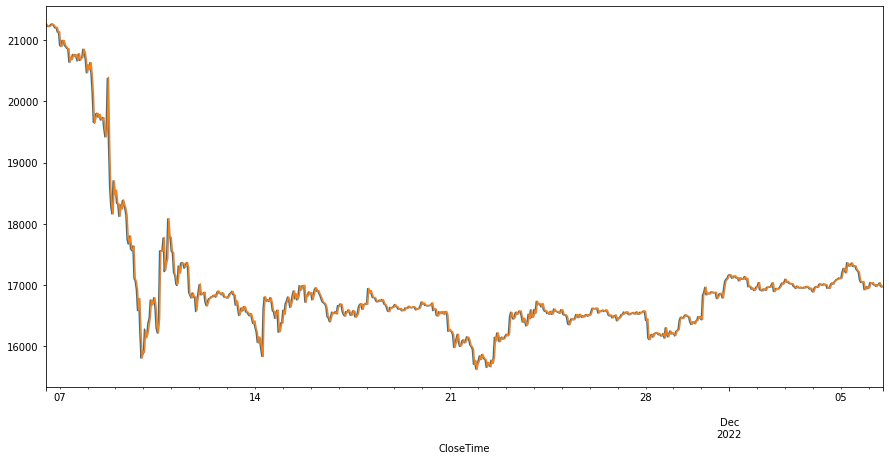

In [26]:
btc['ClosePrice'].plot(figsize = (15,7))
btc['OpenPrice'].plot(figsize = (15,7))

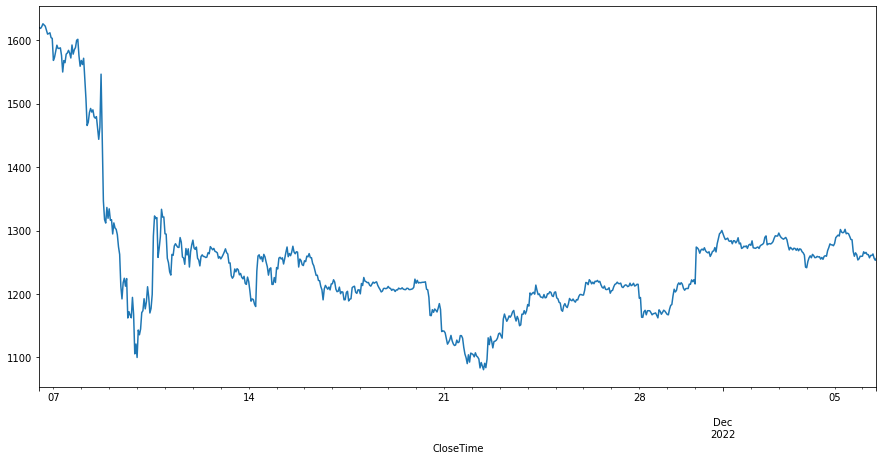

In [24]:
eth['ClosePrice'].plot(figsize = (15,7))


### Bonus

 Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser

In [27]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook


In [28]:
output_notebook()

In [29]:

p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)


### Export

In [31]:


writer = pd.ExcelWriter('cryptos.xlsx')


btc.to_excel(writer, sheet_name='Bitcoin')

eth.to_excel(writer, sheet_name='Ether')


     


In [32]:
writer.save()